In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

N = 2000

def f_real(x):
    return (2 + torch.sin(2*torch.pi*x) + torch.cos(4*torch.pi*x))

class PINN(nn.Module):
    def __init__(self,input_layer=1,h1=64,h2=64,h3=64,output_layer=1):
        super().__init__()
        self.fc1 = nn.Linear(input_layer,h1)
        self.fc2 = nn.Linear(h1,h2)
        self.fc3 = nn.Linear(h2,h3)
        self.fc4 = nn.Linear(h3,output_layer)
        
    def forward(self, x):
        x = F.gelu(self.fc1(x))
        x = F.gelu(self.fc2(x))
        x = F.gelu(self.fc3(x))
        x = F.gelu(self.fc4(x))
        
        return x

In [8]:
pinn = PINN()
optimizer = torch.optim.SGD(pinn.parameters(), lr=0.001) 
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size = 5000, gamma=0.5)
#scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', factor=0.8)
torch.manual_seed(123)
"""
Neural network training using sum of MSE, boundary condition and partial dirivatives.
"""
epochs = 20000

for i in range(epochs):
    
    x_phys = torch.rand(N).view(-1,1).requires_grad_(True)
    
    #compute MSE of T(t,x) and points that were pridicted by PINN
    network = pinn.forward(x_phys)
    loss = torch.mean((f_real(x_phys) - network)**2)
    
    loss.backward()
    
    optimizer.step()
    scheduler.step()
    if i % 1000 == 0:
        print(f'epoch: {i}\tamount of loss: {loss}\t')

epoch: 0	amount of loss: 4.99766731262207	
epoch: 1000	amount of loss: 0.0399605818092823	
epoch: 2000	amount of loss: 0.05274410918354988	
epoch: 3000	amount of loss: 0.03242968022823334	
epoch: 4000	amount of loss: 0.02947796694934368	
epoch: 5000	amount of loss: 0.013809246011078358	
epoch: 6000	amount of loss: 0.01718035526573658	
epoch: 7000	amount of loss: 0.015205972827970982	
epoch: 8000	amount of loss: 0.01647254452109337	
epoch: 9000	amount of loss: 0.009728633798658848	
epoch: 10000	amount of loss: 0.009564390406012535	
epoch: 11000	amount of loss: 0.005925091914832592	
epoch: 12000	amount of loss: 0.006054251454770565	
epoch: 13000	amount of loss: 0.008308170363307	
epoch: 14000	amount of loss: 0.005757997743785381	
epoch: 15000	amount of loss: 0.00781883392482996	
epoch: 16000	amount of loss: 0.0033848269376903772	
epoch: 17000	amount of loss: 0.005998576991260052	
epoch: 18000	amount of loss: 0.004620690830051899	
epoch: 19000	amount of loss: 0.002299119019880891	


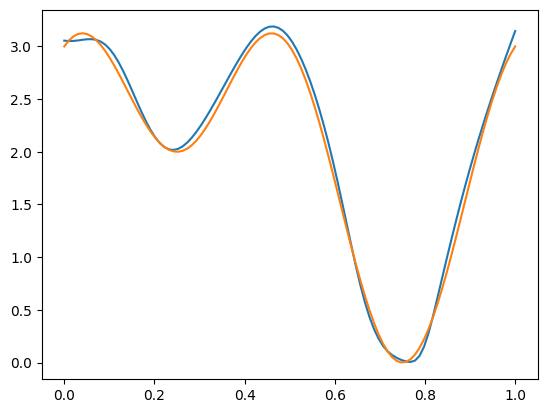

In [9]:
xs = torch.linspace(0, 1, 100).view(-1,1)
T_nn = pinn.forward(xs).view(100)
plt.plot(xs.numpy(), T_nn.detach().numpy())
T_real = f_real(xs).view(100)
plt.plot(xs.numpy(), T_real.numpy())

plt.plot()
plt.show()

In [10]:
x_phys.view(N)

tensor([0.4599, 0.1976, 0.5849,  ..., 0.8395, 0.3567, 0.5680],
       grad_fn=<ViewBackward0>)